# ZADANIE 1

a) Wykonaj poniższy skrypt i przeanalizuj go:

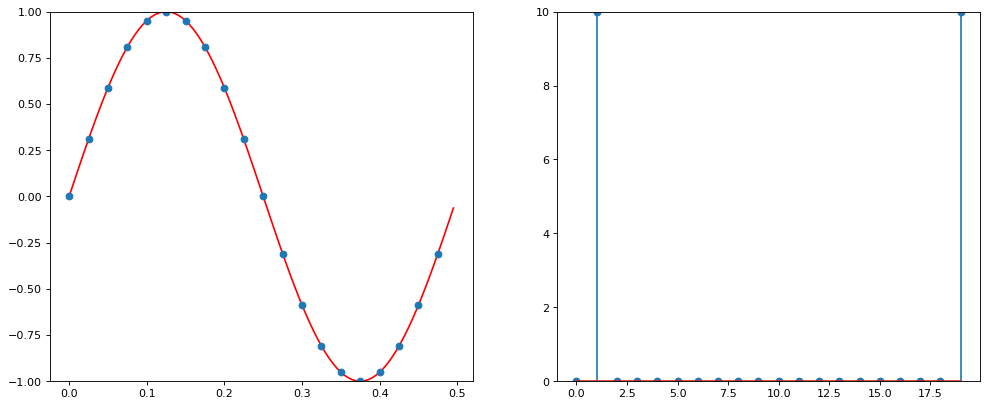

In [31]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt
from scipy.fft import fft
%matplotlib inline

A = 1
# Amplituda sygnału

LP = 1 
# Liczba analizowanych pełnych przebiegów sygnału (okresów)
w = 40           
# czestotliwość probkowania [Hz] sygnału 
#(jak często w ciągu sekundy pobieramy informacje o wartości sygnału)

f = 2.0           
# Czestotliwosc sygnalu [Hz]

T = 1.0/f        
# Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

TW = 1.0/w        
# Okres probkowania [s] (co ile sekund pobieramy próbkę)

t = np.arange(0, LP*T, TW)
# generujemy momenty, w których pobieramy próbki

n = len(t)
    
FUNC = lambda t : A*sin(2*pi*t*f)    
# def. funkcji (tutaj sinus)

signal = FUNC(t)                 
# funkcja sprobkowana

fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
## --- POMOCNICZY SYGNAL
base_t = np.arange(0, LP*T, 1.0/200.0)
base_signal = FUNC(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])
## --- 
ax.plot(t, signal, 'o')

signal1 = fft(signal)
# sygnal w dziedzinie czestotliwosci 
signal1 = abs(signal1)        
# modul sygnalu

freqs = range(int(n))


ax = fig.add_subplot(122)
ymax = max(signal1)
if (ymax > 3.0):
    ax.set_ylim([0.0,ymax])
else:
    ax.set_ylim([0.0,3.0])
stem(freqs, signal1, '-*')

show()

UWAGA: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

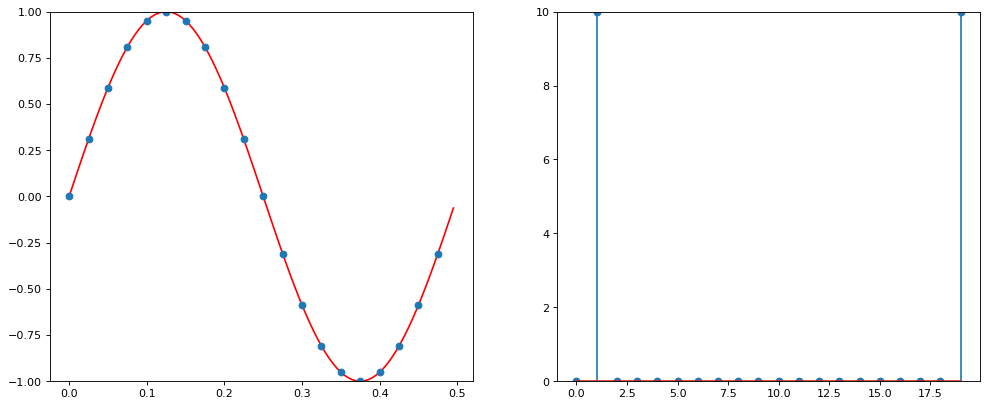

In [32]:
# Zdefiniuj funckję
def ScriptToFunction(A=1, LP=1, w=40, f=2.0):

    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)
        
    FUNC = lambda t : A*sin(2*pi*t*f)    
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)        
    # modul sygnalu

    freqs = range(int(n))


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    show()

ScriptToFunction()

UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [33]:
from ipykernel.pylab.backend_inline import flush_figures

def prosta(a=2, b=0):
    x = linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)
    flush_figures()
    
interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))
    

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.prosta(a=2, b=0)>

b) Zmień częstotliwość próbkowania na 50Hz.

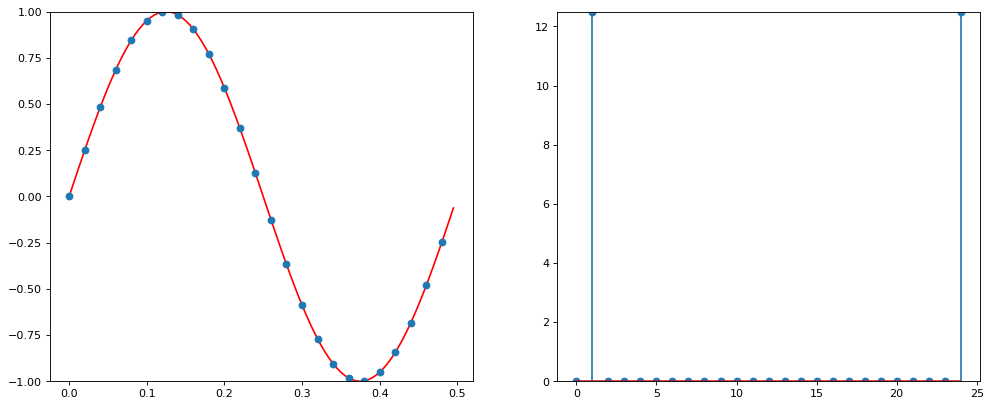

In [34]:
# w=50
ScriptToFunction(w=50)

c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

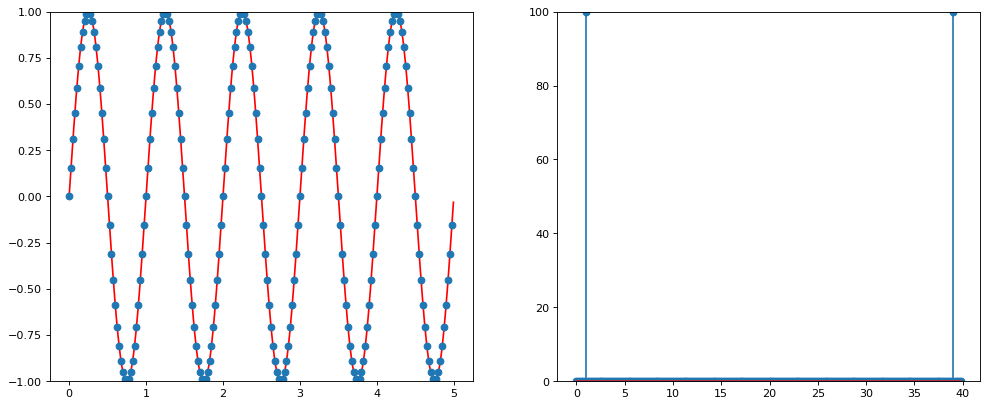

In [35]:
# popraw oś OX
def ScriptToFunction(A=1, LP=1, w=40, f=2.0):

    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)
        
    FUNC = lambda t : A*sin(2*pi*t*f)    
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)        
    # modul sygnalu

    freqs = arange(n)/n*w


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    show()
ScriptToFunction(LP = 5, f = 1)

d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

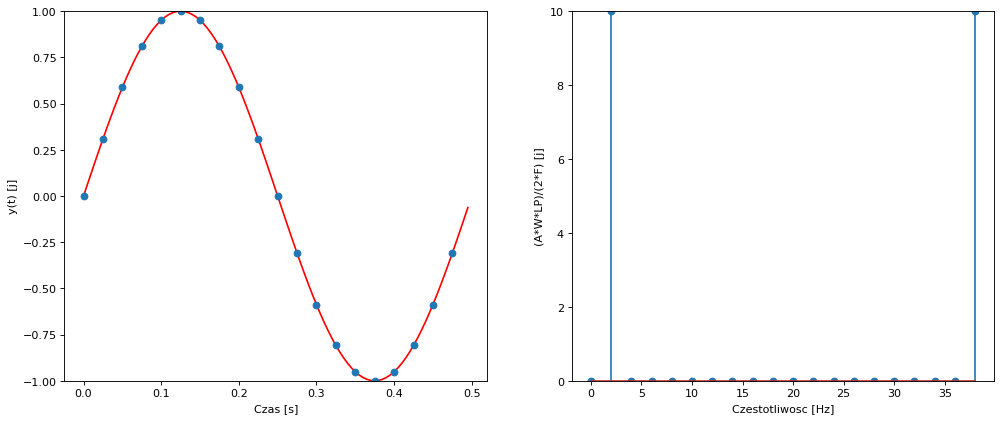

In [36]:
# Podpisz osie wykresów
def ScriptToFunction(A=1, LP=1, w=40, f=2.0):

    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)
        
    FUNC = lambda t : A*sin(2*pi*t*f)    
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')
    plt.xlabel('Czas [s]')
    plt.ylabel('y(t) [j]')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)        
    # modul sygnalu

    freqs = arange(n)/n*w


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')
    plt.ylabel('(A*W*LP)/(2*F) [j]')
    plt.xlabel('Czestotliwosc [Hz]')

    show()
ScriptToFunction()

f) Porównaj spektrum funkcji $sin(2*pi*f*t)$, $2*sin(2*pi*f*t)$ i $3*sin(2*pi*f*t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

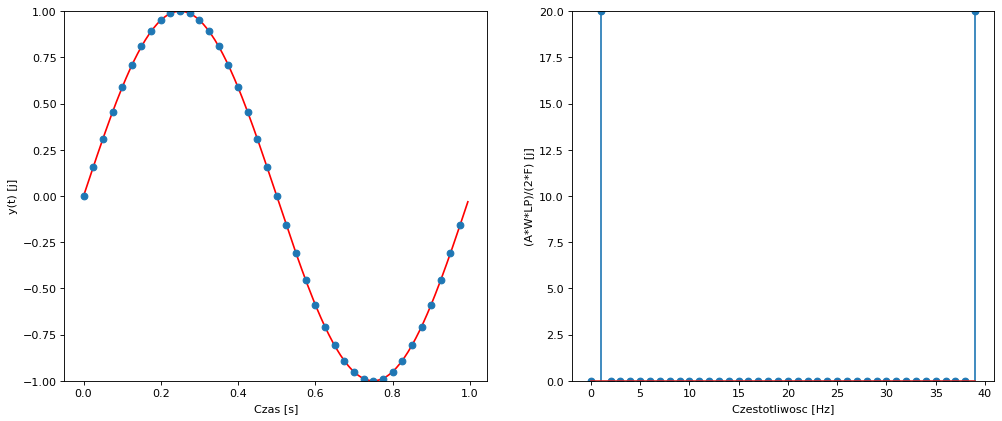

In [37]:
# f=1, A=1, LP=1
ScriptToFunction(f=1,A=1,LP=1)

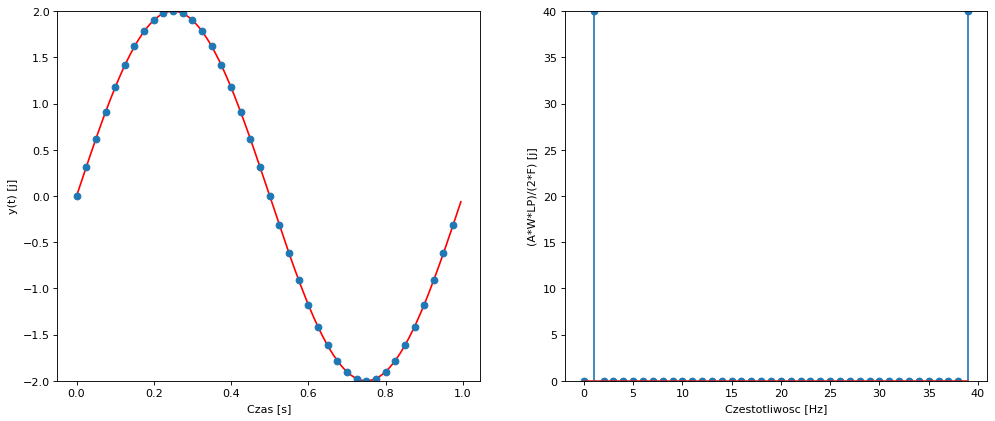

In [38]:
# f=1, A=2, LP=1
ScriptToFunction(f=1,A=2,LP=1)

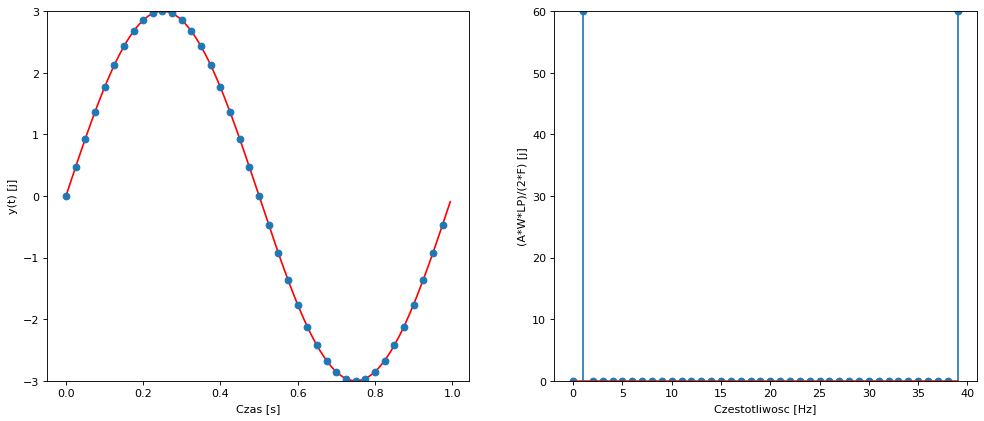

In [39]:
# f=1, A=3, LP=1
ScriptToFunction(f=1,A=3,LP=1)

Na wykresie spektrum wartość na osi OY jest wprost procjonalna do wartości amplitudy funkcji wejściowej

g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, T=1s? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(2*pi*f*t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

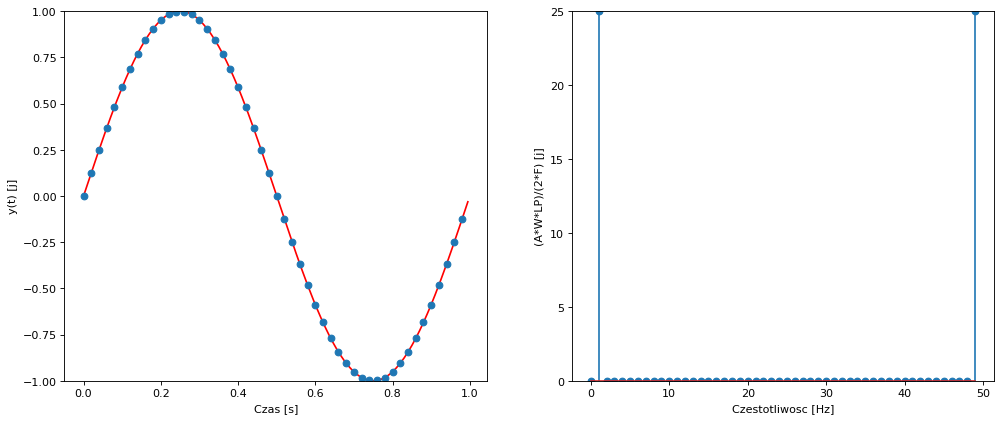

In [40]:
# f=1, w=50, LP=1
ScriptToFunction(f=1,w=50,LP=1)

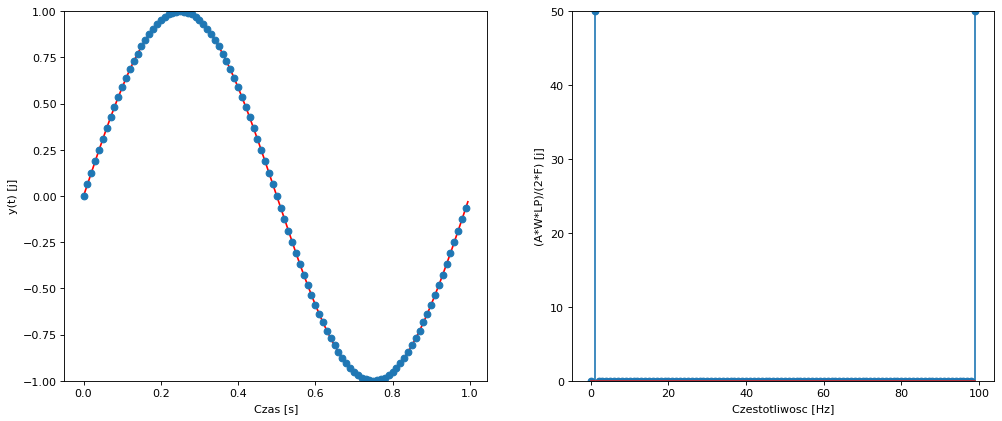

In [41]:
# f=1, w=100, LP=1
ScriptToFunction(f=1,w=100,LP=1)

Na pierwszym wykresie (w=50Hz,T=1s) jest 50 punktów a na drugim (w=100Hz,T=1s) jest 100 punktów. Wartość na osi OY spektrum jest wprost proporcjonalna do częstotliwości próbkowania.

h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji.

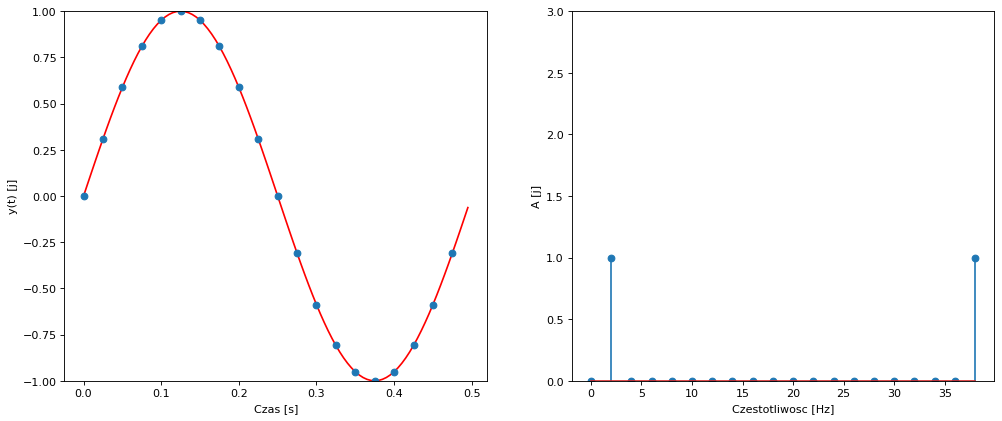

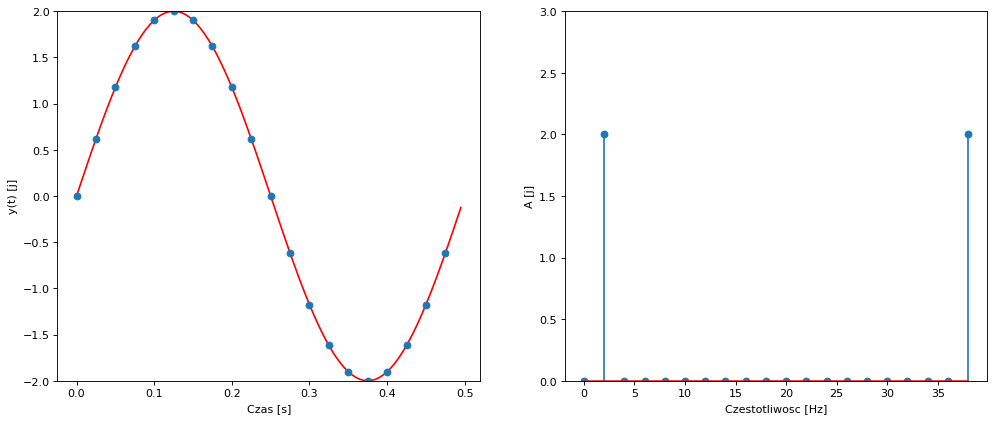

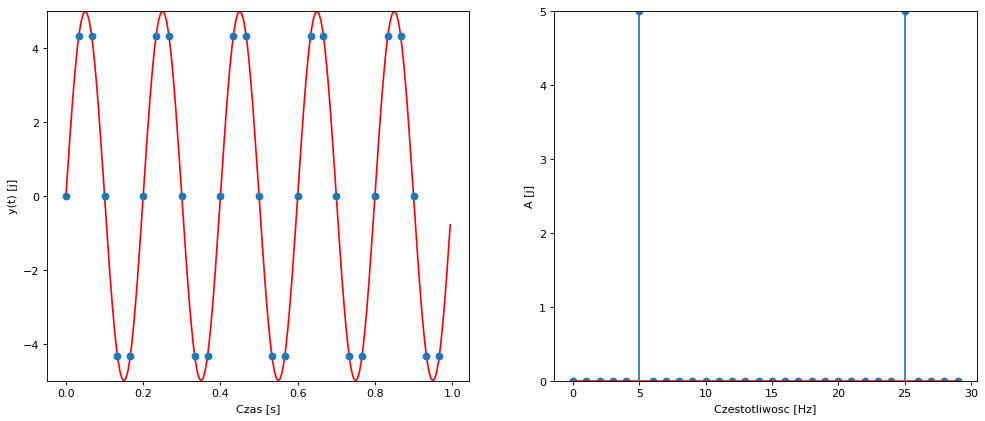

In [63]:
# popraw oś OY
# Podpisz osie wykresów
def ScriptToFunction(A=1, LP=1, w=40, f=2.0):

    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)
        
    FUNC = lambda t : A*sin(2*pi*t*f)    
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')
    plt.xlabel('Czas [s]')
    plt.ylabel('y(t) [j]')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = 2*abs(signal1)/n        
    # modul sygnalu

    freqs = arange(n)/n*w


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')
    plt.ylabel('A [j]')
    plt.xlabel('Czestotliwosc [Hz]')

    show()
ScriptToFunction()
ScriptToFunction(A=2)
ScriptToFunction(w=30,A=5,f=5, LP=5)


# Zadanie 2

a) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

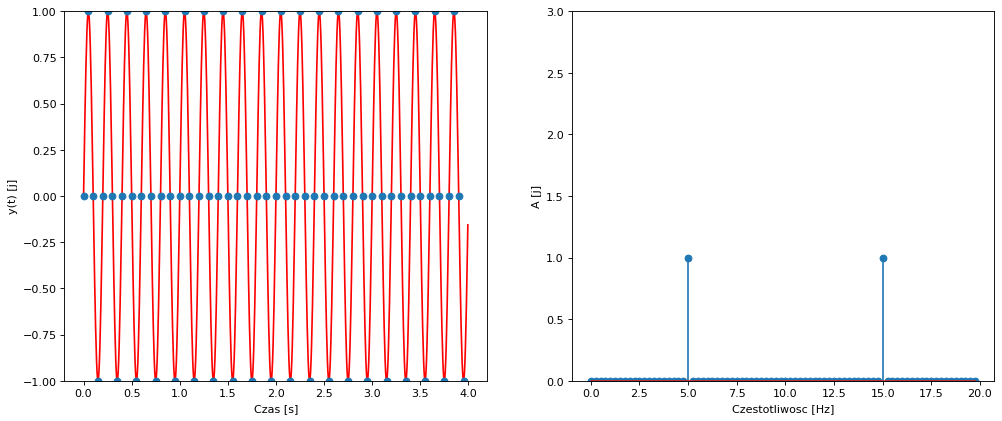

In [43]:
# f=5, w=20, LP=20
ScriptToFunction(f=5,w=20,LP=20)


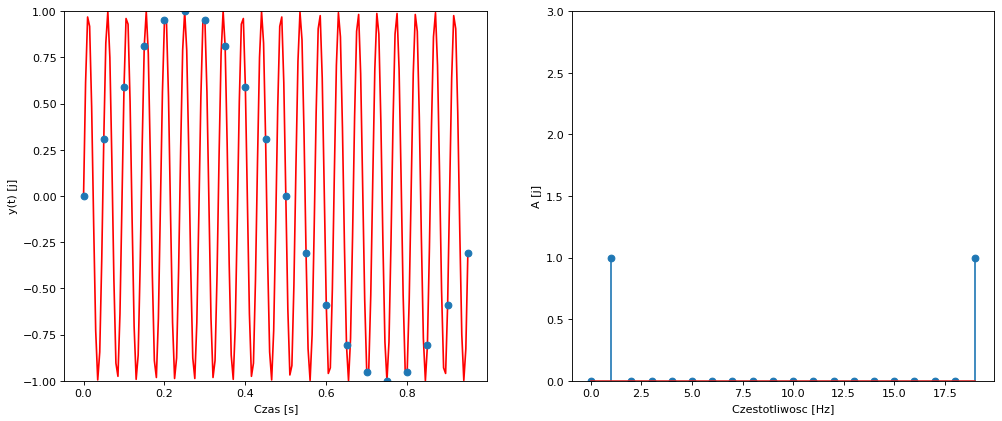

In [44]:
# f=21, w=20, LP=20
ScriptToFunction(f=21,w=20,LP=20)

Po spróbkowanych wykresach ciężko poznać jaka jest funkcja wejściowa. W drugim przypadku w FFT uzykaliśmy częstotliwość 1HZ, ponieważ wykres spróbkowanej funkcji wygląda jak wykres funkcji o innej częstotliwości

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

b) Przy w=100Hz, przeanalizuj widma sygnałów:

I) $sin(2*pi*t*f)$, $f=10Hz$

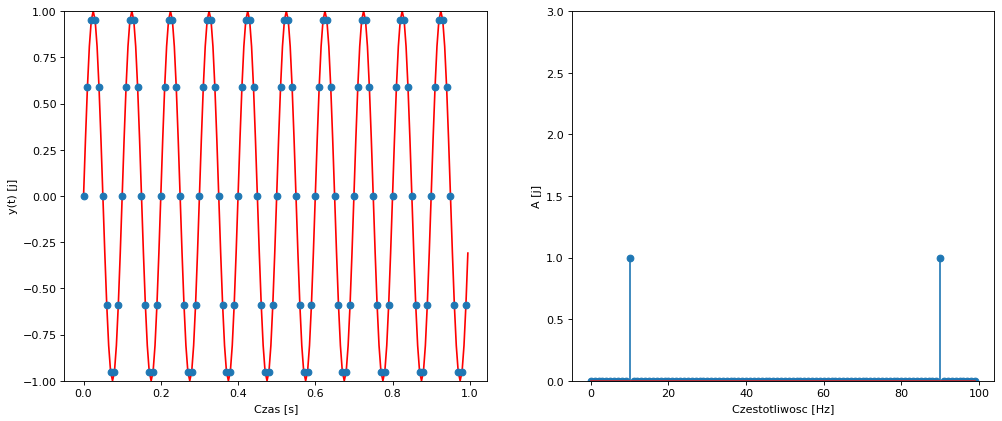

In [45]:
# f=10, w=100, A=1, LP=10
ScriptToFunction(f=10,w=100,A=1,LP=10)

II) $sin(2*pi*t*f)$, $f=20Hz$

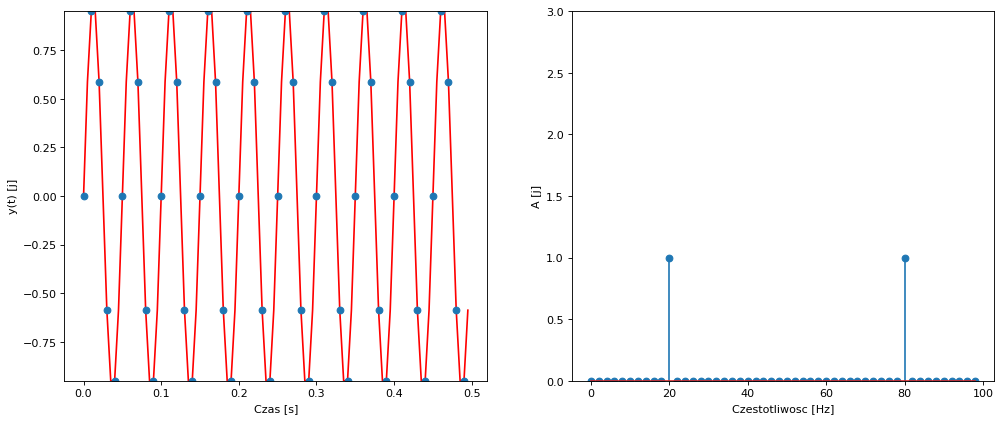

In [46]:
# f=20, w=100, A=1, LP=10
ScriptToFunction(f=20,w=100,A=1,LP=10)

III) $sin(2*pi*t*f)$, $f=30Hz$ (tutaj słupki nie będą wyglądać idealnie; dlaczego?)

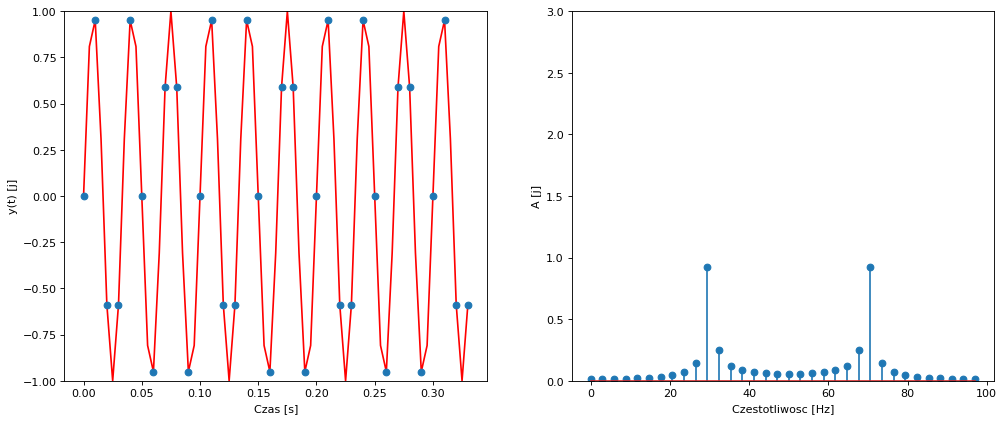

In [47]:
# f=30, w=100, A=1, LP=10
ScriptToFunction(f=30,w=100,A=1,LP=10)

Stosunek w/f jest zbyt niski przez co tracimy informacje na temat naszego sygnału, transformata widzi nasz sygnał jako wiele sygnałów dodanych do siebie o różnych częstotliwościach i amplitudach. 



IV) $sin(2*pi*t*f)$, $f=40Hz$

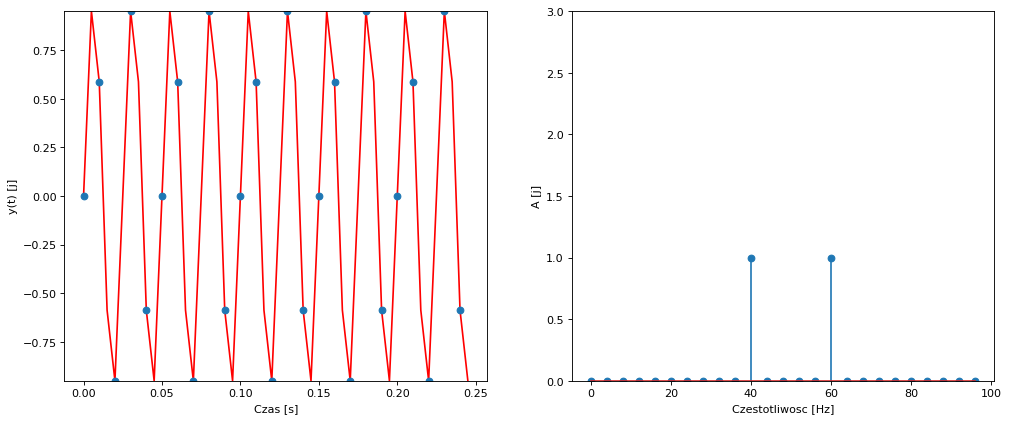

In [48]:
# f=40, w=100, A=1, LP=10
ScriptToFunction(f=40,w=100,A=1,LP=10)

c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróć uwagę na skalę wykresów.

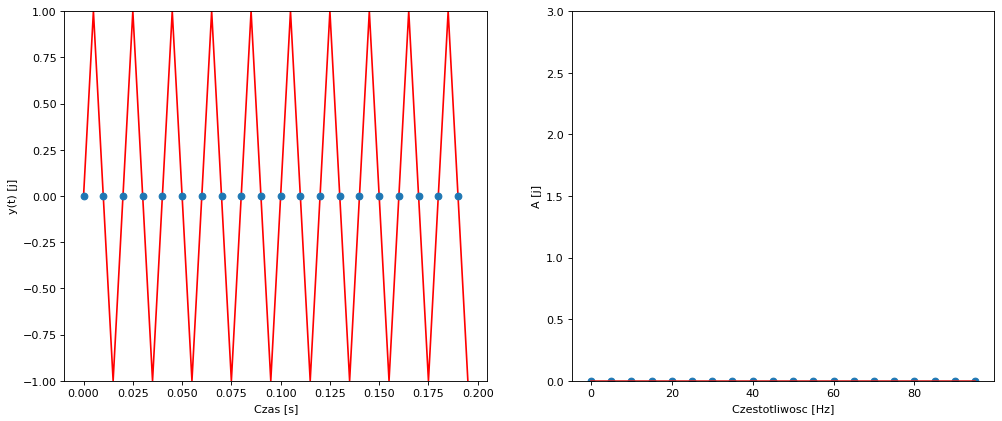

In [49]:
# f=50, w=100, A=1, LP=10
ScriptToFunction(f=50,w=100,A=1,LP=10)

c) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?

Twierdzenie Kotielnikowa-Shannona (/Nyquista-Shannona)

# Zadanie 3

Poniższe przypadki skłądają się z złożonych sygnałów. Trzeba teraz będzie zmodyfikować trochę FUNC

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

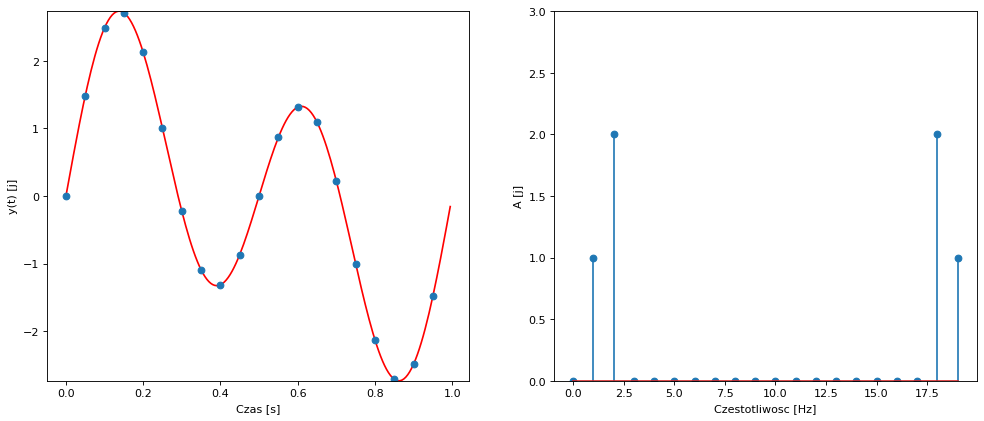

In [50]:
# Wyrysuj sygnał
def ScriptToFunction(A=1, LP=1, w=40, f=2.0):

    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)
        
    FUNC = lambda t : A*sin(2*pi*t*f) + 2*A*sin(4*pi*t*f)    
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')
    plt.xlabel('Czas [s]')
    plt.ylabel('y(t) [j]')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = 2*abs(signal1)/n        
    # modul sygnalu

    freqs = arange(n)/n*w


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')
    plt.ylabel('A [j]')
    plt.xlabel('Czestotliwosc [Hz]')
    show()

ScriptToFunction(w=20, f=1)

c) Wygenerujemy trochę szumu. Wychodząc z funkcji sin(2*pi*t*f), dodamy do niej 100 losowych sinusów. Wygenerujemy dla nich losowo amplitudy (z [0.02, 0.08], częstotliwosci: [5.0, 10.0] oraz modyfikacje fazy[0 + 2*pi]. Inne parametry: w=20Hz, T=1s. Czy dla powyższych paramerów losowania, jesteś w stanie odnaleźć bazowy przebieg (sin(2*pi*t))? Czy jesteś w stanie zlokalizować szum?

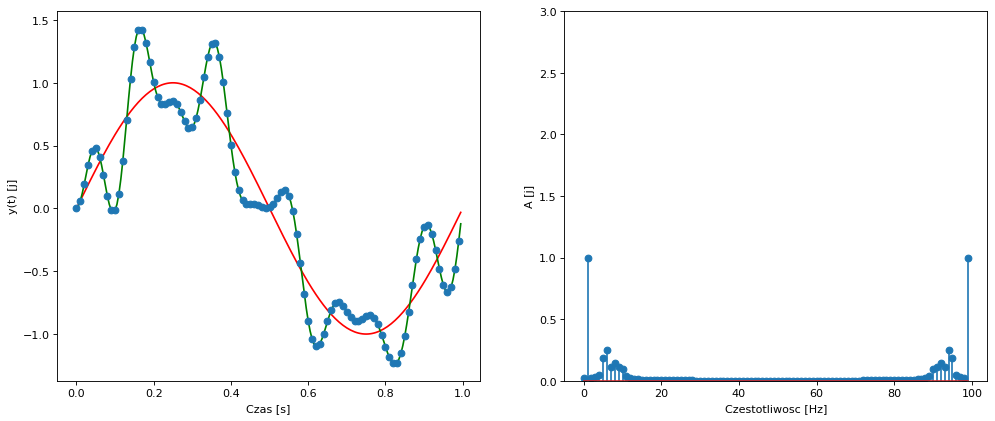

In [64]:
# Wyrysuj sygnał
def ScriptToFunction(A=1, LP=1, w=40, f=2.0):

    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)
        
    FUNC = lambda t : A*sin(2*pi*t*f)
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)     
           
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    noise_signal = FUNC(base_t) # sygnal pierwotny    
    for i in range(100):
        #amplituda od 0.02 do 0.08
        noise_a = random.uniform(0.02, 0.08)
        #czestotliwosc od 5.0 do 10.0
        noise_f = random.uniform(5.0, 10.0)
        #przesuniecie fazy od 0 do 2pi
        noise_ph = random.uniform(0, 2*pi)
        
        noise_func = lambda t: noise_a*sin(2*pi*t*noise_f + noise_ph)
        noise = noise_func(t)
        signal += noise
        
        noise_sample = noise_func(base_t)
        noise_signal += noise_sample # dodajemy 100 szumow do sygnalu

    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.plot(base_t, noise_signal, linestyle='-', color='green')
    ## --- 
    ax.plot(t, signal, 'o')
    plt.xlabel('Czas [s]')
    plt.ylabel('y(t) [j]')

    signal1 = fft(signal)/(n/2)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)        
    # modul sygnalu

    freqs = arange(n)/n*w


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    plt.ylabel('A [j]')
    plt.xlabel('Czestotliwosc [Hz]')
    show()

ScriptToFunction(w=100, f=1)


Można przyjąć, że szum to wartości częstotliwości od 5Hz do 15Hz, dlatego można odnaleźć przebieg funkcji wejściowej

d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

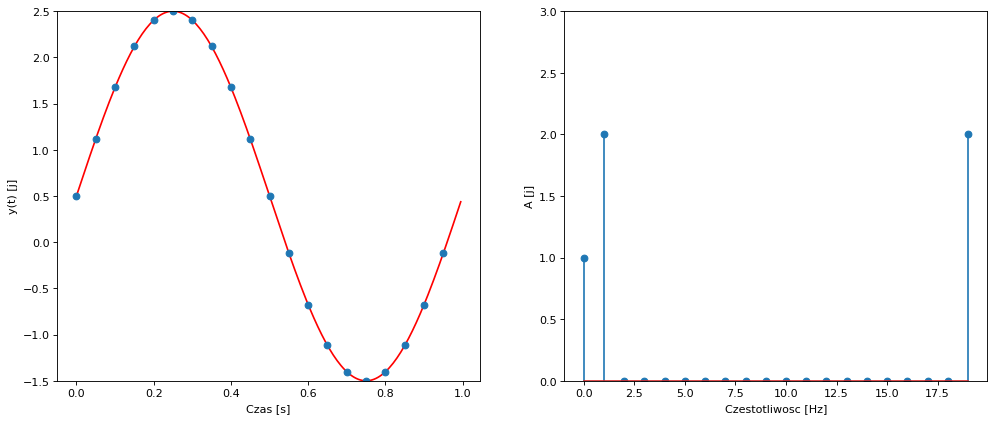

In [ ]:
# Wyrysuj sygnał
# Wyrysuj sygnał
def ScriptToFunction(A=1, LP=1, w=40, f=2.0):

    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)
        
    FUNC = lambda t : 0.5 + A*sin(2*pi*t*f)    
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')
    plt.xlabel('Czas [s]')
    plt.ylabel('y(t) [j]')

    signal1 = fft(signal)/(n/2)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)   
    signal1[0] = abs(signal1[0])/2
    # modul sygnalu

    freqs = arange(n)/n*w


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')
    plt.ylabel('A [j]')
    plt.xlabel('Czestotliwosc [Hz]')
    show()

ScriptToFunction(w=20, f=1, A=2)


Amplituda zerowego prążka jest dwukrotnie zawyżona, ponieważ słupek dla f=0Hz nakłada się na swoje symetryczne odbicie.

e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

[-180.          -90.          136.83676759  -95.18159659    0.
  -96.00900596    0.           40.87936219   31.02458614  133.15238973
 -180.         -133.15238973  -31.02458614  -40.87936219   -0.
   96.00900596   -0.           95.18159659 -136.83676759   90.        ]


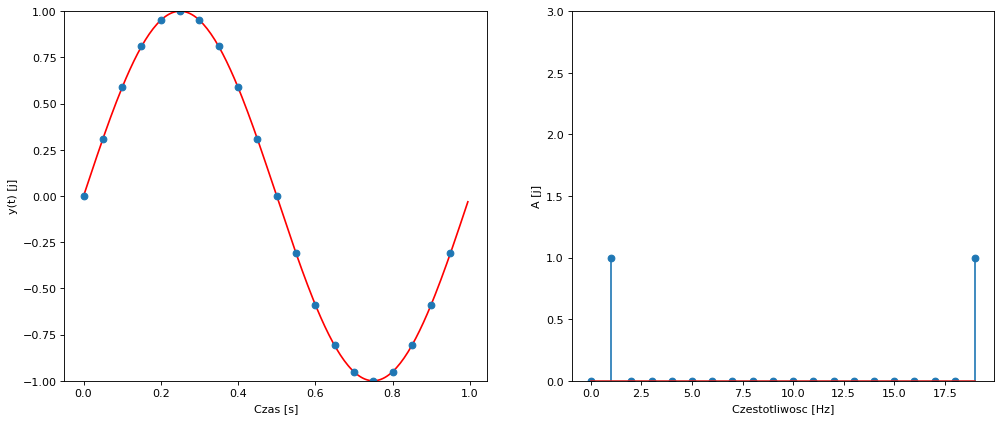

In [53]:
# faza = 0
# Wyrysuj sygnał
def ScriptToFunction(A=1, LP=1, w=40, f=2.0):

    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)
        
    FUNC = lambda t : A*sin(2*pi*t*f) 
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')
    plt.xlabel('Czas [s]')
    plt.ylabel('y(t) [j]')

    signal1 = fft(signal)/(n/2)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)        
    # modul sygnalu

    freqs = arange(n)/n*w


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')
    plt.ylabel('A [j]')
    plt.xlabel('Czestotliwosc [Hz]')
    #print(fft(signal))
    print(np.angle(fft(signal), deg=True))
    show()

ScriptToFunction(w=20,f=1)


[-180.          -45.          115.75060489 -154.08937024  180.
  -80.53767779    0.            7.18277214   51.97889036   90.
 -180.          -90.          -51.97889036   -7.18277214   -0.
   80.53767779 -180.          154.08937024 -115.75060489   45.        ]


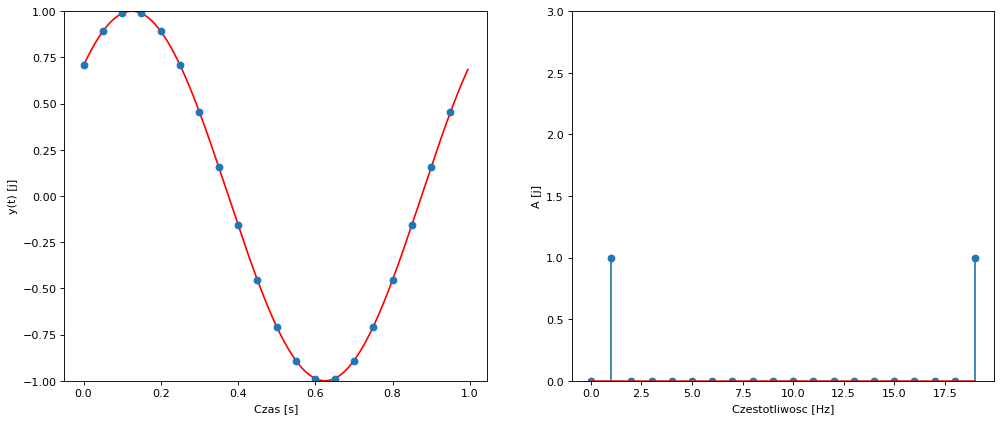

In [54]:
# faza = pi/4
# Wyrysuj sygnał
def ScriptToFunction(A=1, LP=1, w=40, f=2.0):

    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)
        
    FUNC = lambda t : A*sin(2*pi*t*f+pi/4) 
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')
    plt.xlabel('Czas [s]')
    plt.ylabel('y(t) [j]')

    signal1 = fft(signal)/(n/2)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)        
    # modul sygnalu

    freqs = arange(n)/n*w


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')
    plt.ylabel('A [j]')
    plt.xlabel('Czestotliwosc [Hz]')

    print(np.angle(fft(signal), deg=True))
    show()

ScriptToFunction(w=20,f=1)


Informacja o fazie nie zniknęła

# Zadanie 4

Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona?

In [55]:
# wygeneruj wektor x
x = np.random.random(10)
print(x)

[0.88029071 0.47341425 0.55936212 0.45628579 0.92388259 0.95877131
 0.95009478 0.90683778 0.33557068 0.15066532]


In [56]:
# oblicz fft z x
x_fft = fft(x)
print(x_fft)

[ 6.59517533-0.j         -1.23434807+0.04136218j  0.7841981 -0.72825087j
  0.68653334-0.4153097j   0.51586929+0.43622451j  0.70322642-0.j
  0.51586929-0.43622451j  0.68653334+0.4153097j   0.7841981 +0.72825087j
 -1.23434807-0.04136218j]


In [57]:
# oblicz ifft
x_inv = ifft(x_fft)
x_inv

array([0.88029071+0.j, 0.47341425+0.j, 0.55936212+0.j, 0.45628579+0.j,
       0.92388259+0.j, 0.95877131+0.j, 0.95009478+0.j, 0.90683778+0.j,
       0.33557068+0.j, 0.15066532+0.j])

In [58]:
#porownaj x z ifft(fft(x)), wystarczy print
print(x)
print(x_inv)

[0.88029071 0.47341425 0.55936212 0.45628579 0.92388259 0.95877131
 0.95009478 0.90683778 0.33557068 0.15066532]
[0.88029071+0.j 0.47341425+0.j 0.55936212+0.j 0.45628579+0.j
 0.92388259+0.j 0.95877131+0.j 0.95009478+0.j 0.90683778+0.j
 0.33557068+0.j 0.15066532+0.j]


Nie została stracona żadna informacja